In [1]:
# DATA MANIPULATION
import pandas as pd
import numpy as np
import math

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_predict
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
#load data
df = pd.read_pickle(f'../models/all_df.pickle')

#reset row index
df.reset_index(drop=True, inplace=True)
df

,store_nbr,date,sales,onpromotion,city,state,type_stores,cluster,type_holiday,locale,locale_name,oil_price,oil_price_interpolated,transactions
0,1,2013-01-02,7417.148000,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.14,93.14,2111.0
1,1,2013-01-03,5873.244001,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,92.97,92.97,1833.0
2,1,2013-01-04,5919.879001,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.12,93.12,1863.0
3,1,2013-01-05,6318.785010,0,Quito,Pichincha,D,13,Work Day,National,Ecuador,0.00,0.00,1509.0
4,1,2013-01-06,2199.087000,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83483,54,2017-08-11,8513.834000,166,El Carmen,Manabi,C,3,Transfer,National,Ecuador,48.81,48.81,768.0
83484,54,2017-08-12,9139.678002,138,El Carmen,Manabi,C,3,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,903.0
83485,54,2017-08-13,14246.827996,173,El Carmen,Manabi,C,3,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,1054.0
83486,54,2017-08-14,11882.994000,126,El Carmen,Manabi,C,3,Not Holiday,Not Holiday,Not Holiday,47.59,47.59,818.0


/Users/jingxuanzhu/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='sales'>

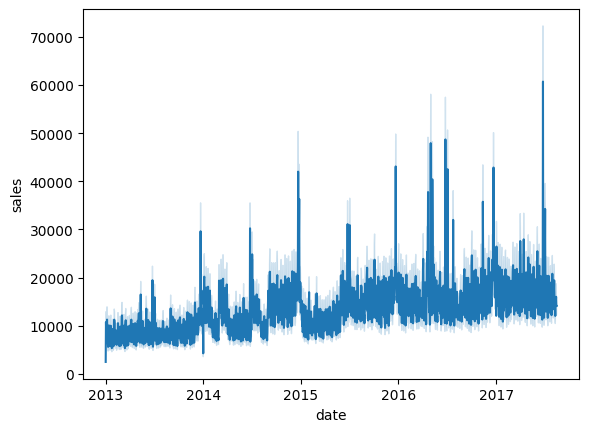

In [3]:
sns.lineplot(df['date'],df['sales'])

In [4]:
def plot_series(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):

    plt.figure(figsize=(10, 6))
    if type(y) is tuple:
      for y_curr in y:
        plt.plot(x[start:end], y_curr[start:end], format)
    else:
      plt.plot(x[start:end], y[start:end], format)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend:
      plt.legend(legend)

    plt.title(title)
    plt.grid(True)
    plt.show()

In [5]:
df_filtered = df[(df['store_nbr'] == 1)]
df_filtered

,store_nbr,date,sales,onpromotion,city,state,type_stores,cluster,type_holiday,locale,locale_name,oil_price,oil_price_interpolated,transactions
0,1,2013-01-02,7417.148000,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.14,93.14,2111.0
1,1,2013-01-03,5873.244001,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,92.97,92.97,1833.0
2,1,2013-01-04,5919.879001,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.12,93.12,1863.0
3,1,2013-01-05,6318.785010,0,Quito,Pichincha,D,13,Work Day,National,Ecuador,0.00,0.00,1509.0
4,1,2013-01-06,2199.087000,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1,2017-08-11,5403.742021,216,Quito,Pichincha,D,13,Transfer,National,Ecuador,48.81,48.81,570.0
1672,1,2017-08-12,7543.623000,103,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,1004.0
1673,1,2017-08-13,3902.782000,73,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,416.0
1674,1,2017-08-14,10433.314000,120,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,47.59,47.59,1733.0


In [6]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'sales' column into a 2D array
sales_column = df_filtered['sales'].values.reshape(-1, 1)

# Apply the scaling transformation to the 'sales' column using .loc accessor
df_filtered.loc[:, 'sales'] = scaler.fit_transform(sales_column)

/var/folders/tw/rk2wwyp53tn3mf0hq9xsl_g40000gn/T/ipykernel_20703/2666695851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'sales'] = scaler.fit_transform(sales_column)


In [7]:
df_filtered

,store_nbr,date,sales,onpromotion,city,state,type_stores,cluster,type_holiday,locale,locale_name,oil_price,oil_price_interpolated,transactions
0,1,2013-01-02,0.198178,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.14,93.14,2111.0
1,1,2013-01-03,0.148971,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,92.97,92.97,1833.0
2,1,2013-01-04,0.150458,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.12,93.12,1863.0
3,1,2013-01-05,0.163171,0,Quito,Pichincha,D,13,Work Day,National,Ecuador,0.00,0.00,1509.0
4,1,2013-01-06,0.031870,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1,2017-08-11,0.134007,216,Quito,Pichincha,D,13,Transfer,National,Ecuador,48.81,48.81,570.0
1672,1,2017-08-12,0.202209,103,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,1004.0
1673,1,2017-08-13,0.086170,73,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,416.0
1674,1,2017-08-14,0.294308,120,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,47.59,47.59,1733.0


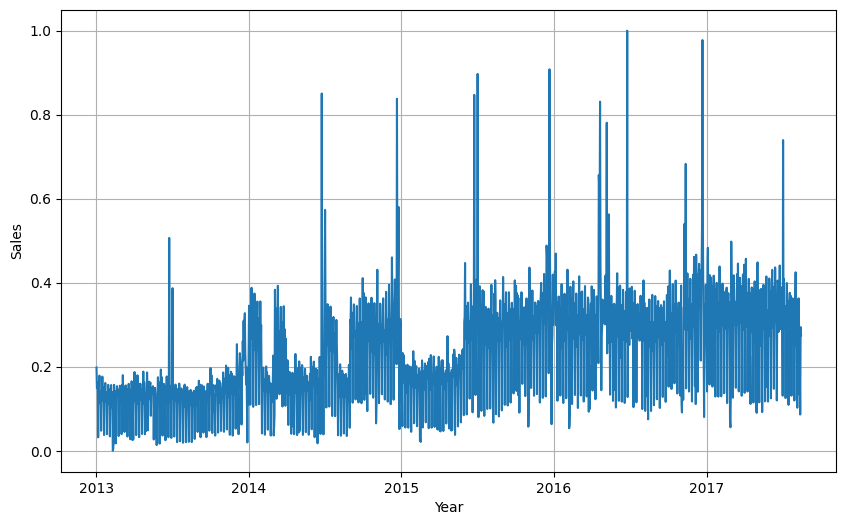

In [8]:
# Convert lists to numpy arrays
time_step = df_filtered['date']
series = df_filtered['sales']
time = np.array(time_step)
series = np.array(series)

# Preview the data
plot_series(time, series, xlabel='Year', ylabel='Sales')

In [9]:
# Define the split time
split_time = 1400

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [10]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [11]:
# Parameters
window_size = 300
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

## 4. use LSTM-CNN

In [12]:
model_LSTM_CNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=[window_size, 1]),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])


In [13]:
# # Set the learning rate
# learning_rate = 8e-4

# # Set the optimizer 
# optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model_LSTM_CNN.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=["mae"])

# Train the model
history = model_LSTM_CNN.fit(train_set,epochs=100)

Epoch 1/100


2023-04-20 08:42:21.162210: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


35/35 [==============================] - 4s 69ms/step - loss: 0.0084 - mae: 0.0913
Epoch 2/100
35/35 [==============================] - 2s 61ms/step - loss: 0.0053 - mae: 0.0718
Epoch 3/100
35/35 [==============================] - 2s 56ms/step - loss: 0.0053 - mae: 0.0711
Epoch 4/100
35/35 [==============================] - 2s 57ms/step - loss: 0.0053 - mae: 0.0716
Epoch 5/100
35/35 [==============================] - 2s 58ms/step - loss: 0.0052 - mae: 0.0710
Epoch 6/100
35/35 [==============================] - 2s 57ms/step - loss: 0.0052 - mae: 0.0697
Epoch 7/100
35/35 [==============================] - 2s 58ms/step - loss: 0.0052 - mae: 0.0705
Epoch 8/100
35/35 [==============================] - 2s 58ms/step - loss: 0.0051 - mae: 0.0684
Epoch 9/100
35/35 [==============================] - 2s 60ms/step - loss: 0.0051 - mae: 0.0680
Epoch 10/100
35/35 [==============================] - 2s 58ms/step - loss: 0.0052 - mae: 0.0698
Epoch 11/100
35/35 [==============================] - 2s 57ms

1/1 [==============================] - 0s 15ms/step


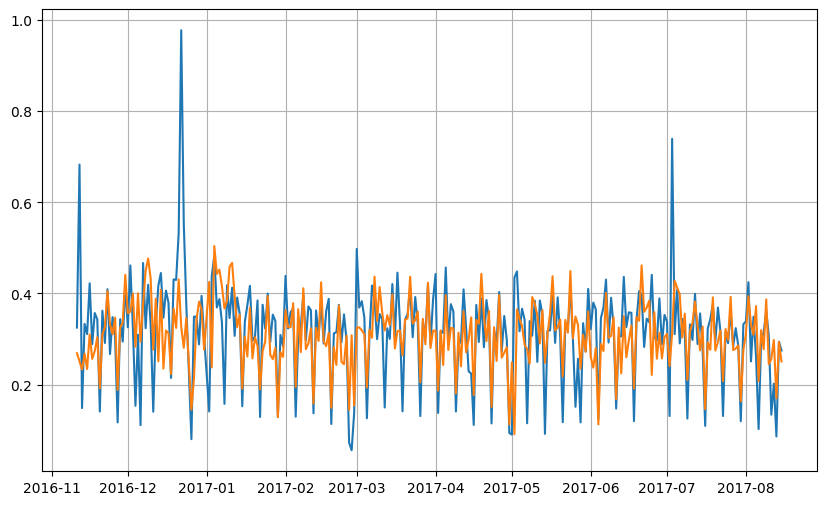

In [14]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_LSTM_CNN.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [15]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

0.008924832
0.064218566
